# Detection

In [12]:
import os
import sys
import pandas as pd
import pickle

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils.audio_to_spectrograms import *

PATH = '../data/detection'

In [15]:
# One time download to local
"""
from huggingface_hub import snapshot_download
repo_id = "kuross/dl-proj-detection"
snapshot_download(repo_id, repo_type='dataset', local_dir = PATH)"""

'\nfrom huggingface_hub import snapshot_download\nrepo_id = "kuross/dl-proj-detection"\nsnapshot_download(repo_id, repo_type=\'dataset\', local_dir = PATH)'

In [8]:
# get files
wav_files = os.listdir(PATH)
wav_files = [i for i in wav_files if i.endswith('.wav')]
wav_files.sort()

annotations = pd.read_csv(PATH + '/annotations.csv').sort_values(by = 'filename').reset_index(drop = True)
annotations['filename'] = annotations['filename'].str[6:] 
annot_filter = annotations.query(f'onset != 0')
assert (annot_filter['filename'] == wav_files).all(), "Available files and annotation.csv filenames do not add up"

In [9]:
# event count breakdown
annot_filter['event_label'].value_counts()

event_label
cough       53
gun_shot    52
dog_bark    48
siren       47
Name: count, dtype: int64

In [10]:
# bg count breakdown
annotations.query(f'onset == 0')['event_label'].value_counts()

event_label
forest         56
coffee_shop    50
airport        48
traffic        46
Name: count, dtype: int64

In [14]:
S_db_all = []
sr = 44100
for file in wav_files:
    S_db = get_mel_spec(file, PATH, sr)
    S_db_all.append(S_db)

In [16]:
export = {'sr':sr, 
          'S_db': S_db_all, 
          'files': wav_files, 
          'onset':np.array(annot_filter['onset']), 
          'offset':np.array(annot_filter['offset']), 
          'event_label':np.array(annot_filter['event_label']),
          'background_label':np.array(annotations.query(f'onset == 0')['event_label']),
          }

pickle.dump(export, open('../data/processed/detection.p', 'wb'))

163: gun_shot in forest


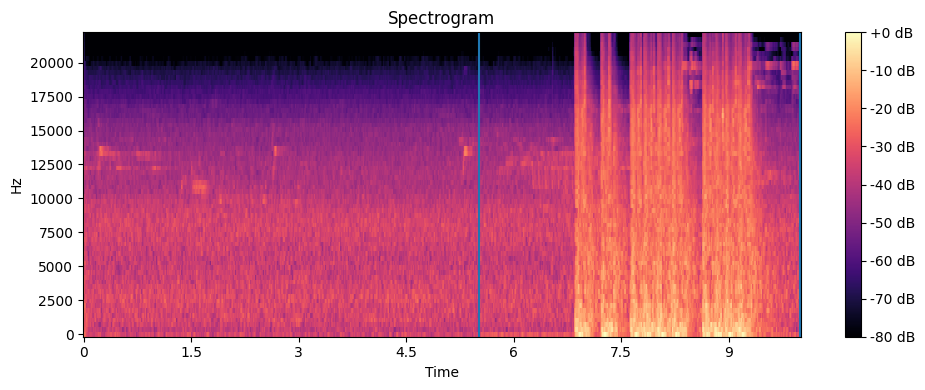

49: gun_shot in forest


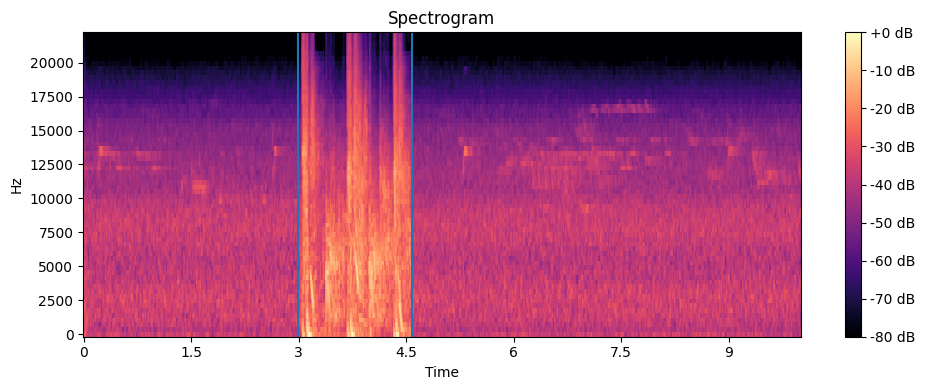

131: cough in coffee_shop


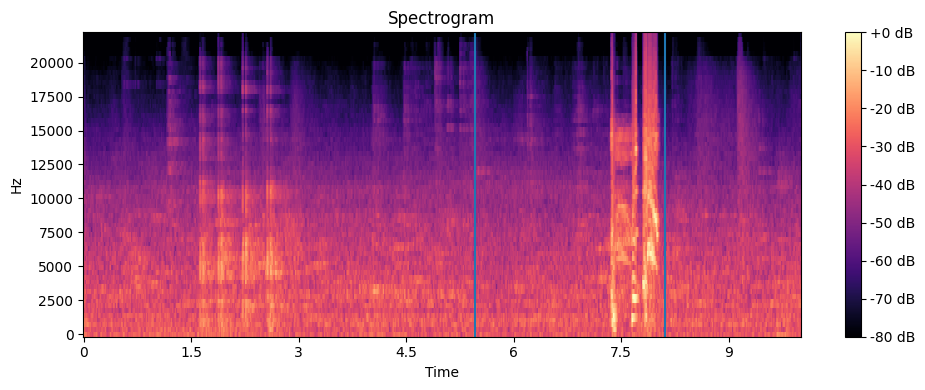

71: cough in coffee_shop


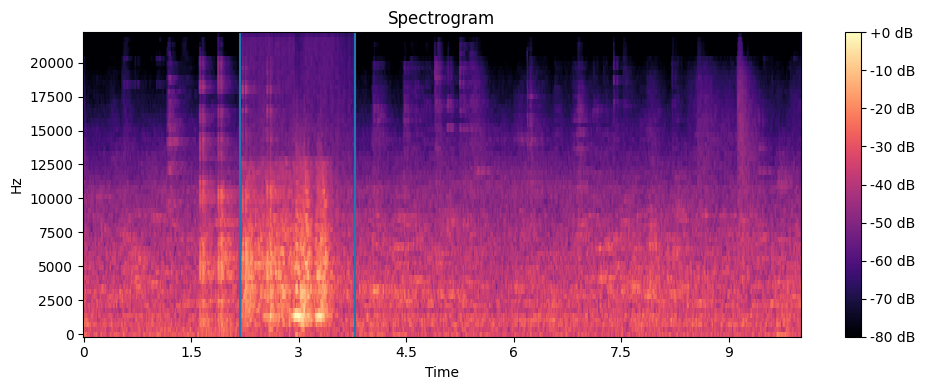

19: gun_shot in traffic


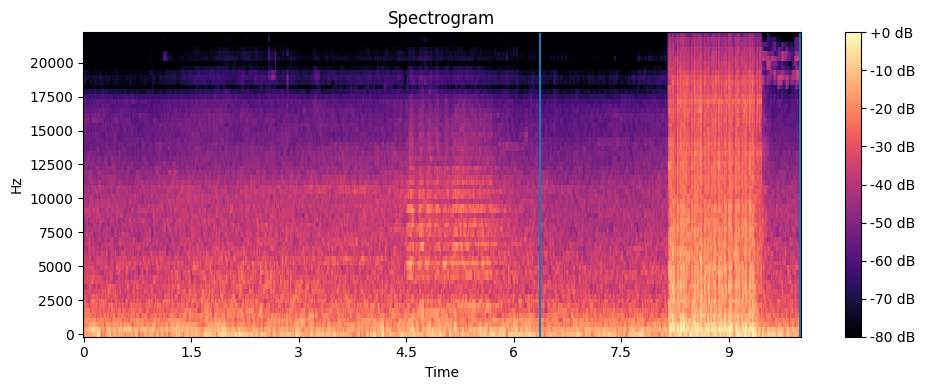

In [17]:
# Quick spectrogram vis
for i in np.random.randint(0, 200, 5):
    print(f'{i}: {export['event_label'][i]} in {export['background_label'][i]}')
    display_spectrogram(S_db_all[i], sr, annot_filter, filename = f'scene_0{str(i).zfill(3)}.wav')